# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Bruce, Kgarimetsa**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [229]:
#   Import numpy as and assign it alias "np" for use in coding to do calculations and numerical operations
#   Import pandas as "pd" for short in order to perform data manipulation such as data structures like DataFrames
#   Import matplotlib.pylot as "plt" to enable us to create visualizations like histograms and charts
#   Import seaborn as "sns" together with matplotlib will be important for creating statistrical visualizations
#   Import train_test_split from the scikit-learn model selection which will be used for splitting data into training and testing sets
#   Import mean squared error (mae) for to be usd to evaluate strength of our models
#   Import regression algorithms in Linear Regression, Decision Trees and Random Forrest from scikit-learn for regression tasks

In [230]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Setting global constants to ensure notebook results are reproducible
## PARAMETER_CONSTANT = ### this is for Kagle

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [231]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")
sample = pd.read_csv("sample_submission_load_shortfall (1).csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
# look at data statistics

In [232]:
#  Get the summary of the dataset we're working with, by getting a sample using .head() method

In [236]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [237]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [233]:
#   Use .info() method to see the data types of entries in the sets we will be using. It's also good to see whether our data has missing values

In [235]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [238]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [234]:
#   Display basic statistics of the dataset such as mean, standard deviation, quartiles, minimum and maximum entries.

In [239]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [240]:
df_train.shape

(8763, 49)

In [116]:
# plot relevant feature interactions

In [241]:
#  Creating scatterplot matrices of each predictor variable againts other variable and the target variable which is the shortfall.
#  Aim is to see any relationship between the predictors and the target

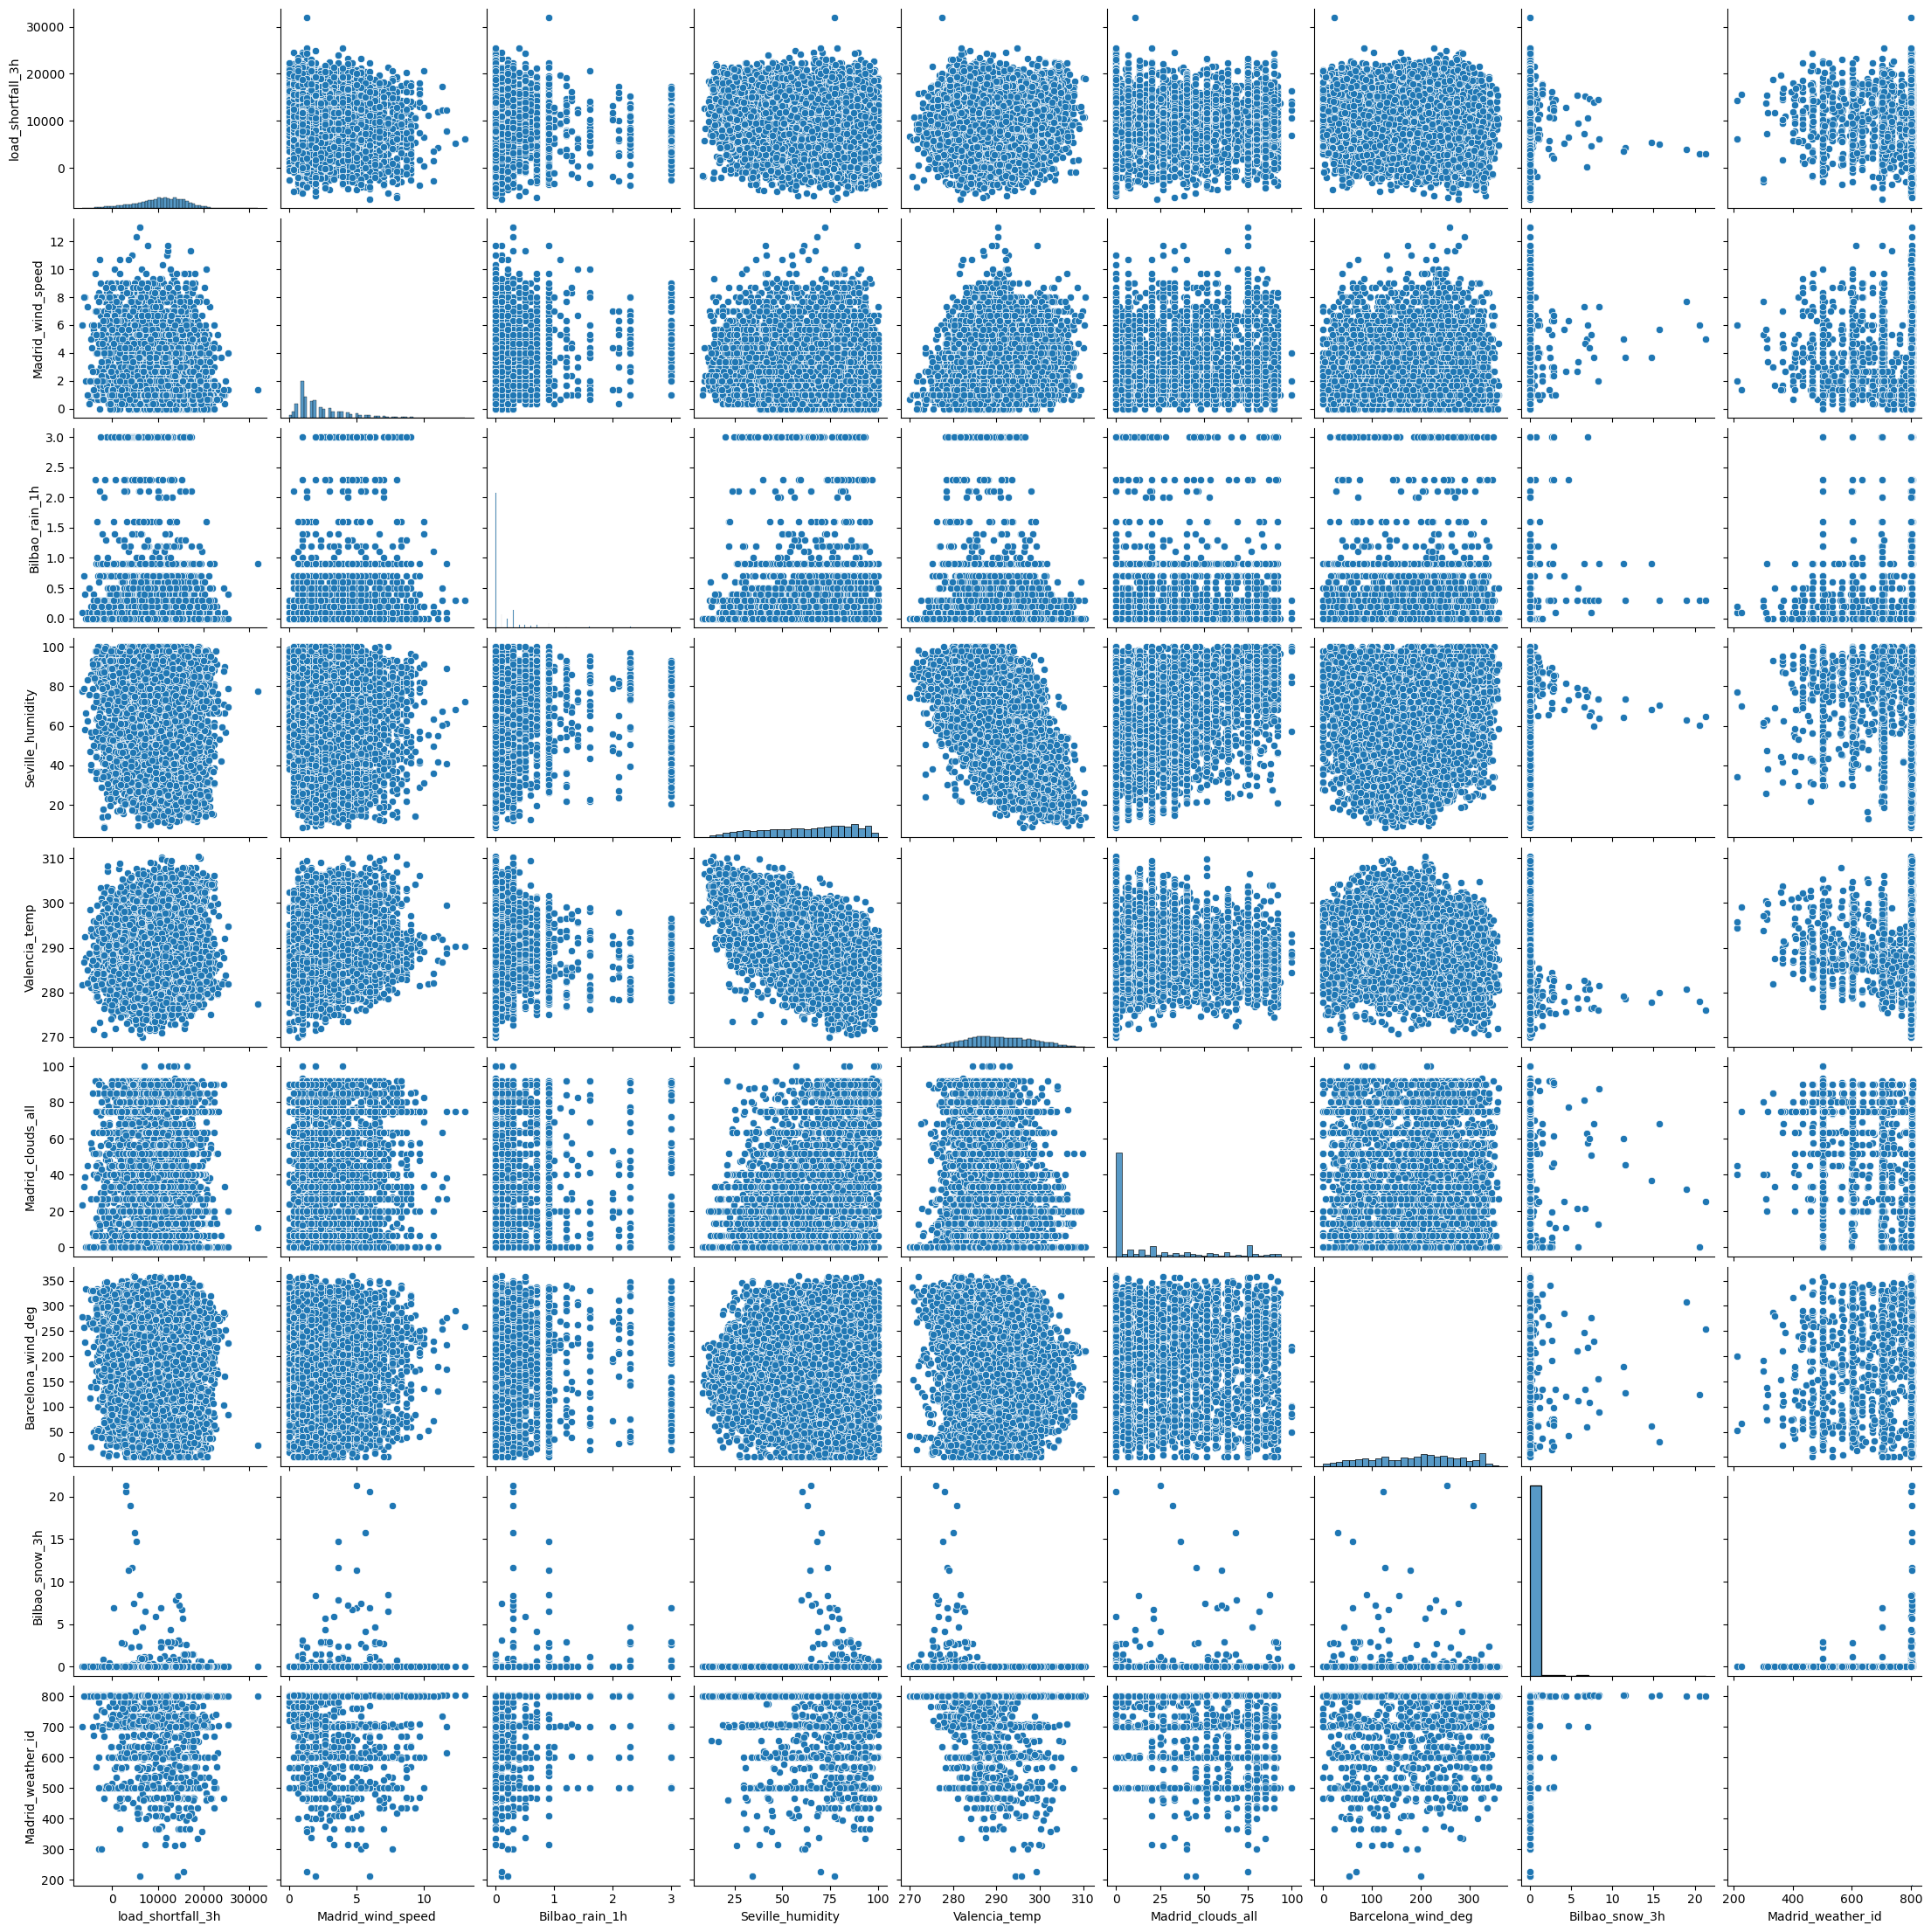

In [242]:
sns.pairplot(df_train[['load_shortfall_3h','Madrid_wind_speed','Bilbao_rain_1h','Seville_humidity','Valencia_temp','Madrid_clouds_all','Barcelona_wind_deg','Seville_pressure','Bilbao_snow_3h','Madrid_weather_id']])
plt.show()

<Axes: xlabel='load_shortfall_3h', ylabel='Count'>

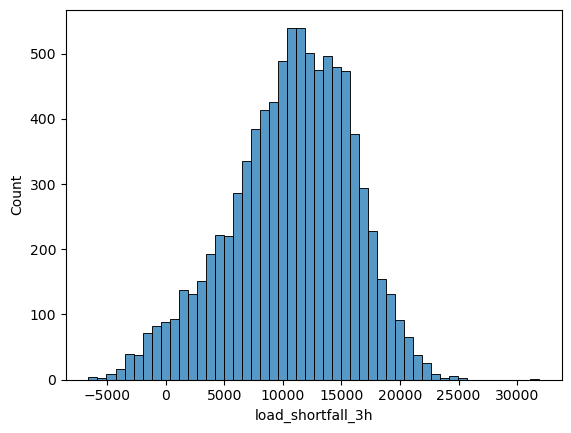

In [243]:
sns.histplot(df_train['load_shortfall_3h'], kde=False, bins=50)

In [245]:
#  Plot the whisker boxplot to display the five number summary of a set of data, in order to see if there are any outliers  

<Axes: xlabel='load_shortfall_3h'>

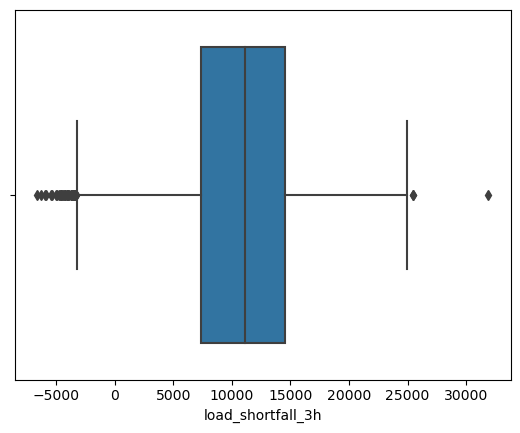

In [244]:
sns.boxplot(x=df_train['load_shortfall_3h'])

In [120]:
# evaluate correlation

In [247]:
#  Find correlation between all the predictor variables against the target variable. seemed as though Barcelona temp had te highest correlation to the load shoatfall by having the correlation value closest to 1.

In [248]:
df_train.corr()

C:\Users\f5172993\AppData\Local\Temp\ipykernel_7472\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


C:\Users\f5172993\AppData\Local\Temp\ipykernel_7472\2486933201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


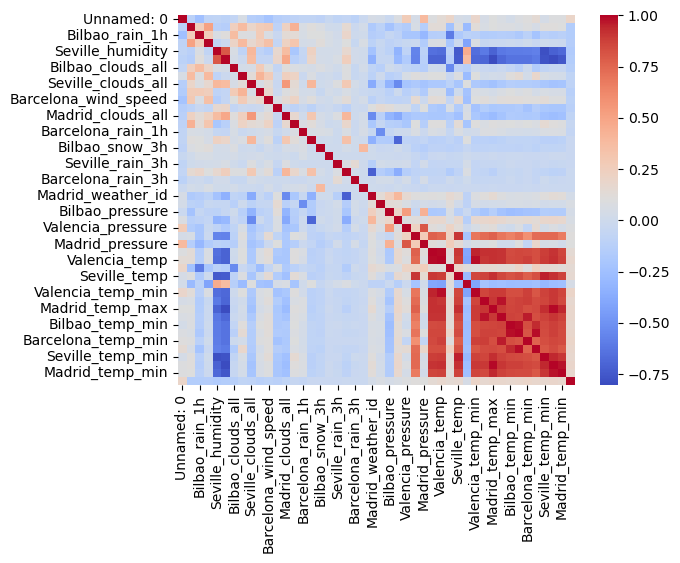

In [249]:
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

<Axes: >

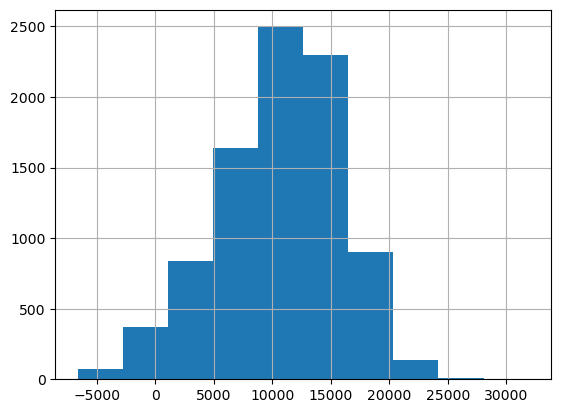

In [250]:
df_train.load_shortfall_3h.hist()

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [251]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [252]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [ ]:
# create new features

In [253]:
#  creat new features by extracting month, day and hour from the time column with all these information

In [254]:
df_train['Month'] = pd.to_datetime(df_train['time']).dt.month
df_train['DayOfWeek'] = pd.to_datetime(df_train['time']).dt.dayofweek
df_train['Hour'] = pd.to_datetime(df_train['time']).dt.hour

In [255]:
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Month,DayOfWeek,Hour
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,3,3
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,3,6


In [256]:
# engineer existing features

In [257]:
df_test['Month'] = pd.to_datetime(df_test['time']).dt.month
df_test['DayOfWeek'] = pd.to_datetime(df_test['time']).dt.dayofweek
df_test['Hour'] = pd.to_datetime(df_test['time']).dt.hour

In [258]:
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Month,DayOfWeek,Hour
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15,1,0,0
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15,1,0,3


In [259]:
#  Before proceeding with the next step of creating model, we need to make sure the data is in its best form in order to output accurate results
#  Therefore in the data cleaing phase, i've decided to remove variables that I think will cause discrepancies, such as variables with a lot of missing values, variables in wrong datatypes (non-numeric)

In [260]:
df_train = df_train.drop(['time','Valencia_wind_deg', 'Seville_pressure','Valencia_pressure'], axis =1)

In [261]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   Madrid_wind_speed     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_rain_1h      

In [262]:
df_test = df_test.drop(['Valencia_wind_deg', 'Seville_pressure','Valencia_pressure'], axis =1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h    

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# create targets and features dataset

In [176]:
df_train.isnull().sum()

Unnamed: 0              0
Madrid_wind_speed       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp 

In [263]:
y = df_train['load_shortfall_3h']
X = df_train.drop(['load_shortfall_3h'], axis=1)

In [163]:
def commentary():
    print('Splitting the dataset (training) into the target variable y and predictor variables X')
f = commentary()

Splitting the dataset (training) into the target variable y and predictor variables X


In [195]:
# split data

In [264]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [197]:
# create one or more ML models

In [266]:
#   Three models chosen: Linear Regression, Decision Tress Regressor and Random Forest Regressor

In [265]:
lin_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

In [199]:
# fit models in training data

In [267]:
lin_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# evaluate one or more ML models

In [268]:
y_pred_lin = lin_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# start by calculating the mean squared error

In [269]:
mse_lin = mean_squared_error(y_val, y_pred_lin)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_rf = mean_squared_error(y_val, y_pred_rf)

In [270]:
print('LinearRegression MSE = ', mse_lin)
print('DecisionTrees MSE = ', mse_dt)
print('RandomTrees MSE = ', mse_rf)

LinearRegression MSE =  22972780.85859648
DecisionTrees MSE =  22082307.21630381
RandomTrees MSE =  11306114.791394588


In [271]:
rmse_lin = np.sqrt(mse_lin)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)

In [272]:
print('LinearRegression RMSE = ', rmse_lin)
print('DecisionTrees RMSE = ', rmse_dt)
print('RandomTrees RMSE = ', rmse_rf)

LinearRegression RMSE =  4792.992891565403
DecisionTrees RMSE =  4699.181547493543
RandomTrees RMSE =  3362.4566601511146


In [ ]:
# Choose best model and motivate why it is the best choice

In [273]:
df_test_2 = df_test.copy()
df_test_2 = df_test_2.drop(['time'], axis =1)
#df_test_2.info()

In [274]:
y_pred_test_df = rf_model.predict(df_test_2)

In [275]:
dataframe = pd.DataFrame(y_pred_test_df, columns=['load_shortfall_3h'])
time = df_test['time']
KaggleSubmission = time.to_frame().join(dataframe)
KaggleSubmission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,12031.373333
1,2018-01-01 03:00:00,7363.180000
2,2018-01-01 06:00:00,7437.863333
3,2018-01-01 09:00:00,9301.220000
4,2018-01-01 12:00:00,11895.010000
...,...,...
2915,2018-12-31 09:00:00,6928.466667
2916,2018-12-31 12:00:00,9628.326667
2917,2018-12-31 15:00:00,10098.720000
2918,2018-12-31 18:00:00,9838.793333


In [223]:
KaggleSubmission.to_csv('KaggleSubmission2.csv', index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

In [276]:
# The goal of the predict is to formulate a machine learning model to predict the three-hourly demand shortfalls in the energy generated by means of fossil fuels and various renewable sources for Spain.
# It started with importing various libraries, loading the given csv datafiles into a DataFrames. 
# Conducted exploratory data analysis (EDA), cleaning and feature engineering the data.
# I came up with a few regression models that predict the three-hour load shortfall, and compared the model performance to choose the best one.
# The model uses various weather features such as pressure, wind speed, humidity to predict the daily shortfall between the energy generated by fossil fuels and various renewable sources.
# Each model's accuracy was assessed using appropriate evaluation metrics, such as the mean squared error (mse) and the root mean squared error (rmse)
# A model that had the lowest mse or rmse was chosen to be the most accuarate of the used models, in this case the random forest regression proved to be the best one.